<a href="https://colab.research.google.com/github/IngyBadawi/iris-dataset-visualization/blob/main/Iris_Dataset_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
import seaborn as sn
from google.colab import files
import scipy.stats as stats

## **Importing the dataset**

In [ ]:
! mkdir /content/dataset
! mkdir /content/output
! unzip /content/iris.zip -d /content/dataset

mkdir: cannot create directory ‘/content/dataset’: File exists
mkdir: cannot create directory ‘/content/output’: File exists
Archive:  /content/iris.zip
replace /content/dataset/Iris.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/dataset/Iris.csv  
replace /content/dataset/database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/dataset/database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/dataset/database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/dataset/database.sqlite  


## **Extracting the dataset**

In [ ]:
dataset = pd.read_csv('dataset/Iris.csv')
dataset = dataset.drop(columns=['Id'])
CLASSES = dataset.columns
SPECIES = dataset['Species'].unique()
COLOURS = ['firebrick', 'darkcyan', 'goldenrod']

In [ ]:
x = []
for species in SPECIES:
  x.append(dataset.loc[dataset['Species'] == species])

## **Histograms**

mkdir: cannot create directory ‘/content/output/histograms’: File exists


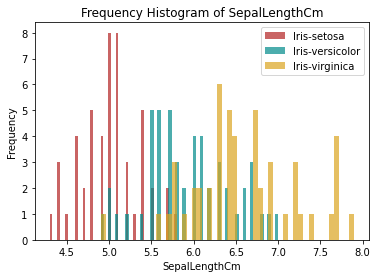

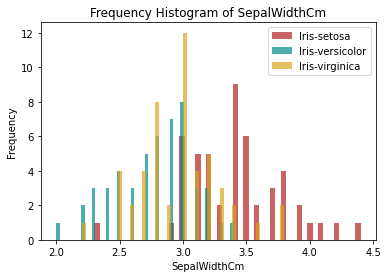

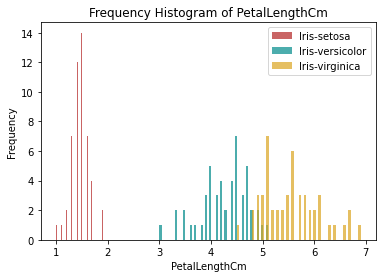

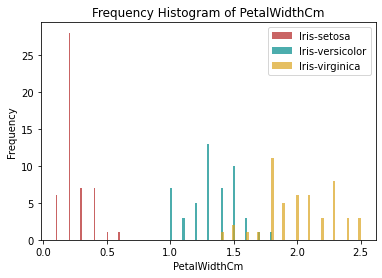

In [ ]:
! mkdir /content/output/histograms
my_path = '/content/output/histograms/'
kwargs = dict(alpha=0.7, bins=50)
for feature in CLASSES[0:len(CLASSES)-1]:
  my_file = feature + '.jpg'
  for i in range(len(SPECIES)):
    #print(feature + ', '+ SPECIES[i] + ': ')
    #print(x[i][feature])
    plt.hist(x[i][feature], **kwargs, color= COLOURS[i], label=SPECIES[i])
    plt.legend()
    plt.gca().set(title='Frequency Histogram of ' + feature, ylabel='Frequency', xlabel = feature)
  plt.savefig(os.path.join(my_path, my_file))
  plt.show()

## **EXTRA: Gaussian Distributions of attributes**

mkdir: cannot create directory ‘/content/output/Gaussian_Distributions’: File exists


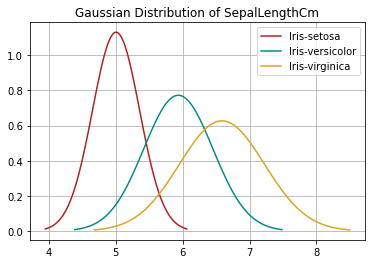

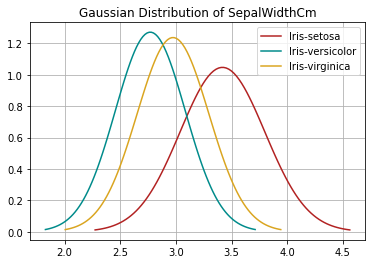

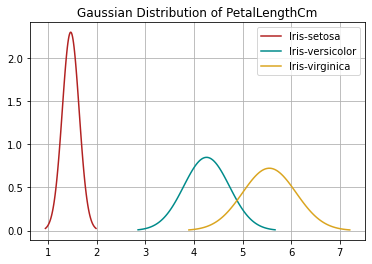

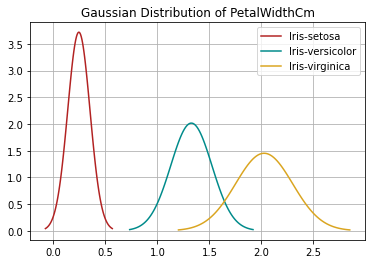

In [ ]:
! mkdir /content/output/Gaussian_Distributions
my_path = '/content/output/Gaussian_Distributions/'
for feature in CLASSES[0:len(CLASSES)-1]:
  my_file = feature + '.jpg'
  for i in range(len(SPECIES)):
    mu = x[i][feature].mean()
    sigma = x[i][feature].std()
    y = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(y, stats.norm.pdf(y, mu, sigma), color = COLOURS[i], label = SPECIES[i])
    plt.gca().set(title='Gaussian Distribution of ' + feature)
    plt.legend()
  plt.grid()
  plt.savefig(os.path.join(my_path, my_file))
  plt.show()

## **2D Scatter Plots**

mkdir: cannot create directory ‘/content/output/2D_scatter_plots’: File exists


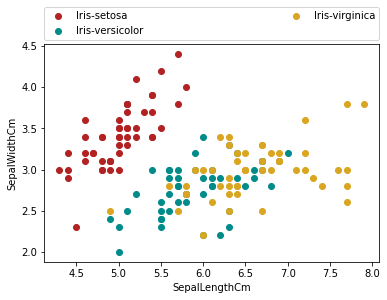

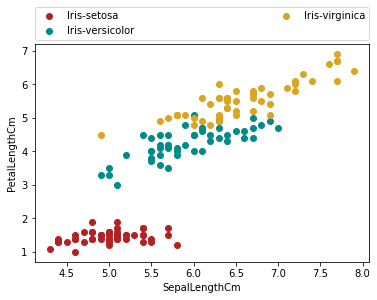

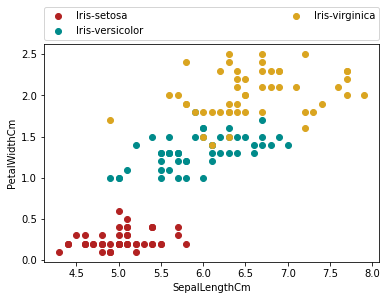

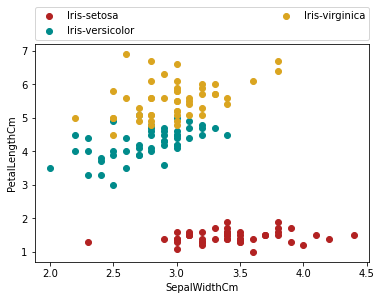

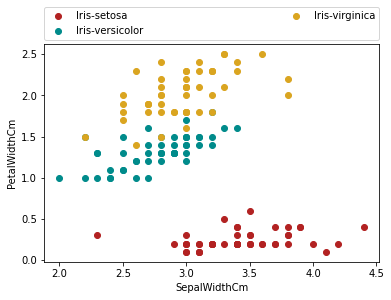

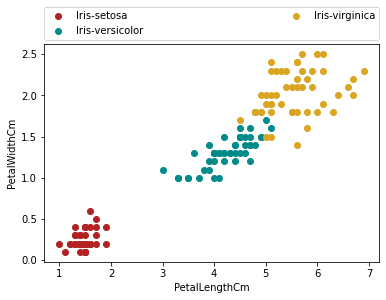

In [ ]:
! mkdir /content/output/2D_scatter_plots
my_path = '/content/output/2D_scatter_plots/'
for i in range(len(CLASSES)):
  for j in range(i + 1, len(CLASSES) - 1):
    my_file = dataset.columns[i] + '_VS_' + dataset.columns[j] + '.jpg'
    plt.xlabel(CLASSES[i])
    plt.ylabel(CLASSES[j])
    for k in range(len(SPECIES)):
      plt.scatter(x[k][CLASSES[i]], x[k][CLASSES[j]], color = COLOURS[k], label=SPECIES[k])
      plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)
    plt.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight')
    plt.show()

## **3D Scatter Plots**

mkdir: cannot create directory ‘/content/output/3D_scatter_plots’: File exists


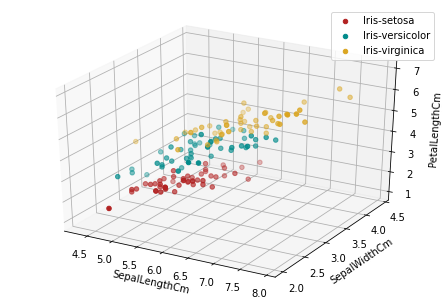

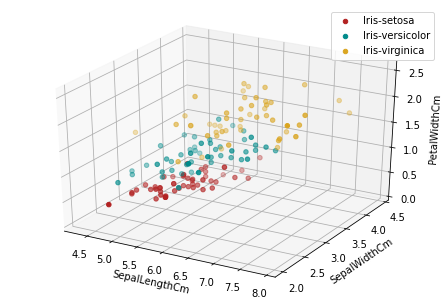

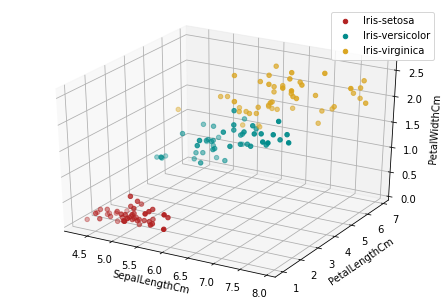

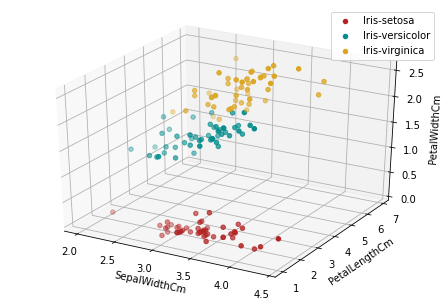

In [ ]:
! mkdir /content/output/3D_scatter_plots
my_path = '/content/output/3D_scatter_plots/'
for i in range(len(CLASSES)):
  for j in range(i + 1, len(CLASSES) - 1):
    for k in range(j + 1, len(CLASSES) - 1):
      my_file = dataset.columns[i] + '_VS_' + dataset.columns[j] + '_VS_' + dataset.columns[k] + '.jpg'
      fig = plt.figure()
      ax = Axes3D(fig)
      ax.set_xlabel(CLASSES[i])
      ax.set_ylabel(CLASSES[j])
      ax.set_zlabel(CLASSES[k])
      for l in range(len(SPECIES)):
        ax.scatter(x[l][CLASSES[i]], x[l][CLASSES[j]], x[l][CLASSES[k]], color = COLOURS[l], label=SPECIES[l])
        plt.legend()
      plt.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight')
      plt.show()

## **Correlation Matrix**

mkdir: cannot create directory ‘/content/output/correlation_matrix’: File exists


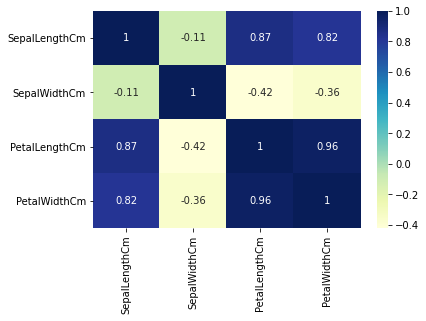

In [ ]:
! mkdir /content/output/correlation_matrix
my_path = '/content/output/correlation_matrix'
corrMatrix = dataset.corr()
original_stdout = sys.stdout # Save a reference to the original standard output

with open('/content/output/correlation_matrix/correlation_matrix.txt', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print (corrMatrix)
    sys.stdout = original_stdout # Reset the standard output to its original value
my_file = 'correlation_matrix.jpg'
sn.heatmap(corrMatrix, cmap = "YlGnBu", annot=True)
plt.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight')
plt.show()

## **Box Plots**

mkdir: cannot create directory ‘/content/output/Box_plots’: File exists


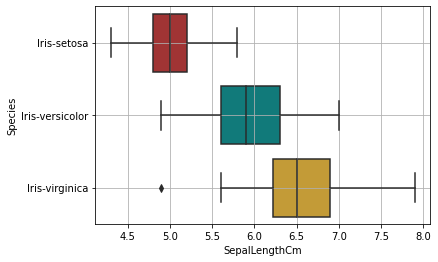

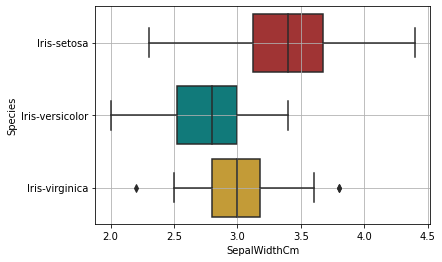

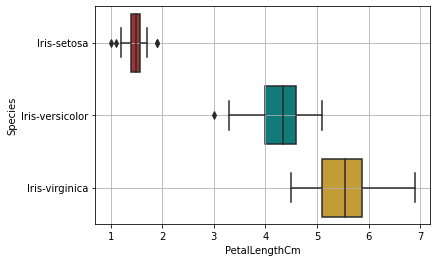

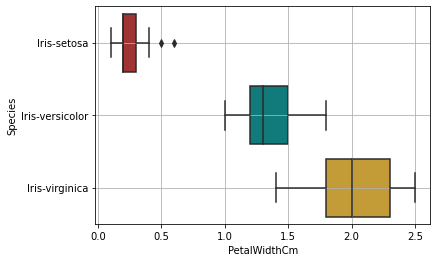

In [ ]:
! mkdir /content/output/Box_plots
my_path = '/content/output/Box_plots'
my_pal = {"Iris-setosa": "firebrick", "Iris-versicolor": "darkcyan", "Iris-virginica":"goldenrod"}
for column in CLASSES[0:len(CLASSES)-1]:
  sn.boxplot( y=dataset["Species"], x=dataset[column], palette=my_pal)
  my_file = column + '_boxplot.jpg'
  plt.grid()
  plt.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight')
  plt.show()

##**Zipping and exporting output**

In [ ]:
!zip -r /content/output.zip /content/output
files.download("/content/output.zip")

updating: content/output/ (stored 0%)
updating: content/output/Gaussian_Distributions/ (stored 0%)
updating: content/output/Gaussian_Distributions/SepalLengthCm.jpg (deflated 16%)
updating: content/output/Gaussian_Distributions/PetalLengthCm.jpg (deflated 19%)
updating: content/output/Gaussian_Distributions/SepalWidthCm.jpg (deflated 16%)
updating: content/output/Gaussian_Distributions/PetalWidthCm.jpg (deflated 21%)
updating: content/output/histograms/ (stored 0%)
updating: content/output/histograms/SepalLengthCm.jpg (deflated 14%)
updating: content/output/histograms/PetalLengthCm.jpg (deflated 14%)
updating: content/output/histograms/SepalWidthCm.jpg (deflated 16%)
updating: content/output/histograms/PetalWidthCm.jpg (deflated 16%)
updating: content/output/2D_scatter_plots/ (stored 0%)
updating: content/output/2D_scatter_plots/SepalWidthCm_VS_PetalWidthCm.jpg (deflated 12%)
updating: content/output/2D_scatter_plots/SepalLengthCm_VS_PetalWidthCm.jpg (deflated 10%)
updating: content/ou

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>